In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('D:\dickys task\Happy Work\GIS and Data Science\Trial\Python\MP4_RealEstate_Taiwan\Real estate valuation_Taiwan.xlsx',
                  index_col='No')
df.head()

,transaction date,house age (years),distance to the nearest MRT station (m),number of convenience stores,latitude,longitude,house price of unit area
No,,,,,,,
1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.shape

(414, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 7 columns):
transaction date                           414 non-null float64
house age (years)                          414 non-null float64
distance to the nearest MRT station (m)    414 non-null float64
number of convenience stores               414 non-null int64
latitude                                   414 non-null float64
longitude                                  414 non-null float64
house price of unit area                   414 non-null float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


In [5]:
df.describe()

,transaction date,house age (years),distance to the nearest MRT station (m),number of convenience stores,latitude,longitude,house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


## Data Cleaning

In [6]:
df.isnull().sum()

transaction date                           0
house age (years)                          0
distance to the nearest MRT station (m)    0
number of convenience stores               0
latitude                                   0
longitude                                  0
house price of unit area                   0
dtype: int64

    - Data has no missing values

In [7]:
#drop unimportant columns
df.drop(['transaction date','longitude','latitude'], axis=1, inplace=True)

In [8]:
df.head()

,house age (years),distance to the nearest MRT station (m),number of convenience stores,house price of unit area
No,,,,
1,32.0,84.87882,10,37.9
2,19.5,306.59470,9,42.2
3,13.3,561.98450,5,47.3
4,13.3,561.98450,5,54.8
5,5.0,390.56840,5,43.1


In [9]:
#Checking duplicated value

df.duplicated().sum()

0

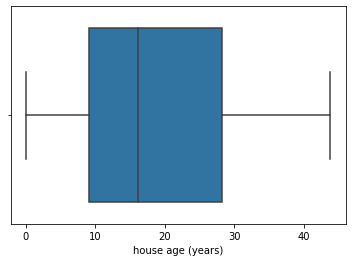

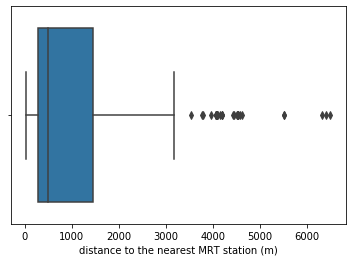

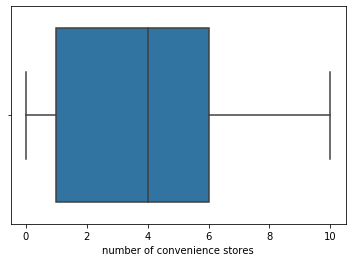

In [10]:
#Seeking for outliers
for col in ['house age (years)','distance to the nearest MRT station (m)','number of convenience stores']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])

- distance to the nearest MRT station (m) column has some outilers

In [11]:
df[df['distance to the nearest MRT station (m)']>3500] #showing expected value of the outliers

,house age (years),distance to the nearest MRT station (m),number of convenience stores,house price of unit area
No,,,,
9,31.7,5512.038,1,18.8
31,25.9,4519.690,0,22.1
36,13.9,4079.418,0,27.3
41,13.6,4082.015,0,15.9
42,16.8,4066.587,0,18.2
49,24.2,4605.749,0,13.4
50,29.4,4510.359,1,13.2
59,30.3,4510.359,1,22.6
74,13.8,4082.015,0,20.0


In [12]:
(df['distance to the nearest MRT station (m)']>3100).value_counts()

False    376
True      38
Name: distance to the nearest MRT station (m), dtype: int64

#### Removing outliers using IQR method

In [13]:
Q1, Q3 = np.percentile(df['distance to the nearest MRT station (m)'], [25,75])
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)

289.3248
1454.279
1164.9542000000001


In [14]:
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
print(lower_bound)
print(upper_bound)

-1458.1065000000003
3201.7103


In [15]:
outliers = df[(df['distance to the nearest MRT station (m)'] > upper_bound) | 
              (df['distance to the nearest MRT station (m)'] < lower_bound)]
outliers.count()

house age (years)                          37
distance to the nearest MRT station (m)    37
number of convenience stores               37
house price of unit area                   37
dtype: int64

In [16]:
df_new = df.drop(outliers.index)

In [17]:
df.shape

(414, 4)

In [18]:
df_new.shape

(377, 4)

In [19]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 1 to 414
Data columns (total 4 columns):
house age (years)                          377 non-null float64
distance to the nearest MRT station (m)    377 non-null float64
number of convenience stores               377 non-null int64
house price of unit area                   377 non-null float64
dtypes: float64(3), int64(1)
memory usage: 14.7 KB


#### Removing outliers using z score

In [20]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[1.25562833 0.79249504 2.00740743 0.00590088]
 [0.15708622 0.61661163 1.66750286 0.3105072 ]
 [0.38779067 0.41401527 0.30788458 0.6857819 ]
 ...
 [0.09556786 0.54967846 0.98769372 0.19277396]
 [0.84478419 0.77668389 0.30788458 1.06841493]
 [0.98539758 0.78807071 1.66750286 1.90726426]]


In [21]:
threshold = 3
print(np.where(z > 3))

(array([  8, 116, 249, 255, 270, 347], dtype=int64), array([1, 1, 1, 1, 3, 1], dtype=int64))


In [22]:
df_new2 = df[(z < 3).all(axis=1)]

In [42]:
df_new2

,house age (years),distance to the nearest MRT station (m),number of convenience stores,house price of unit area
No,,,,
1,32.0,84.87882,10,37.9
2,19.5,306.59470,9,42.2
3,13.3,561.98450,5,47.3
4,13.3,561.98450,5,54.8
5,5.0,390.56840,5,43.1
...,...,...,...,...
410,13.7,4082.01500,0,15.4
411,5.6,90.45606,9,50.0
412,18.8,390.96960,7,40.6


## Feature Engineering

- Correlation Analysis

### Dataframe with IQR

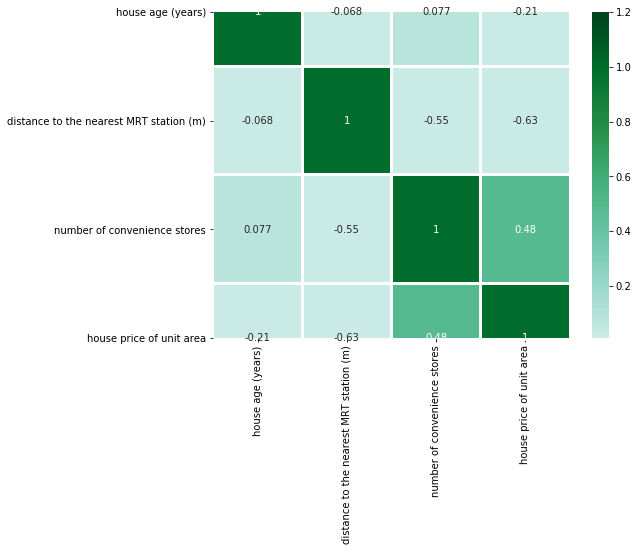

In [24]:
plt.figure(figsize=(8,6))
corr = df_new.corr()
sns.heatmap(corr,annot=True, linewidth=2, cmap="BuGn", center=0.4, vmin=0.01, vmax=1.2)

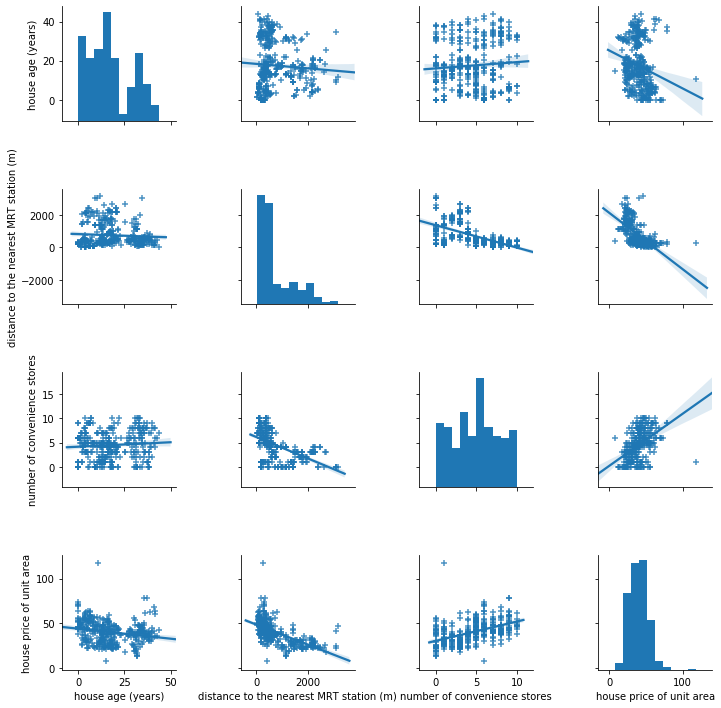

In [25]:
sns.pairplot(df_new, kind='reg', markers='+')

- All the features have good and very good correlation with label which means all are important

### Dataframe with Z score

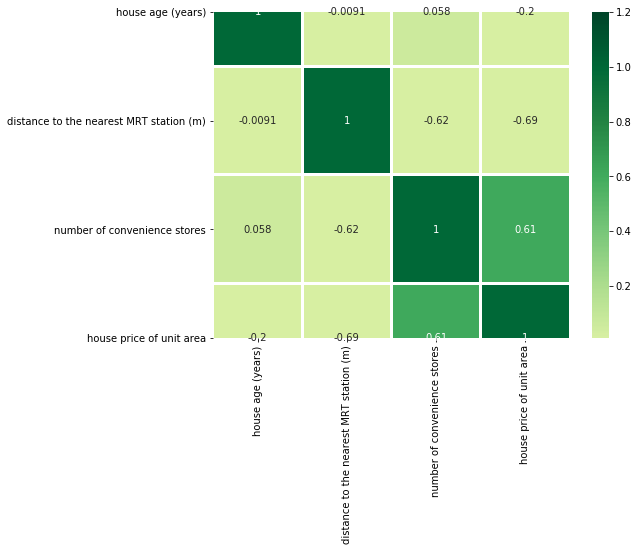

In [26]:
plt.figure(figsize=(8,6))
corr = df_new2.corr()
sns.heatmap(corr,annot=True, linewidth=2, cmap="YlGn", center=0.4, vmin=0.01, vmax=1.2)

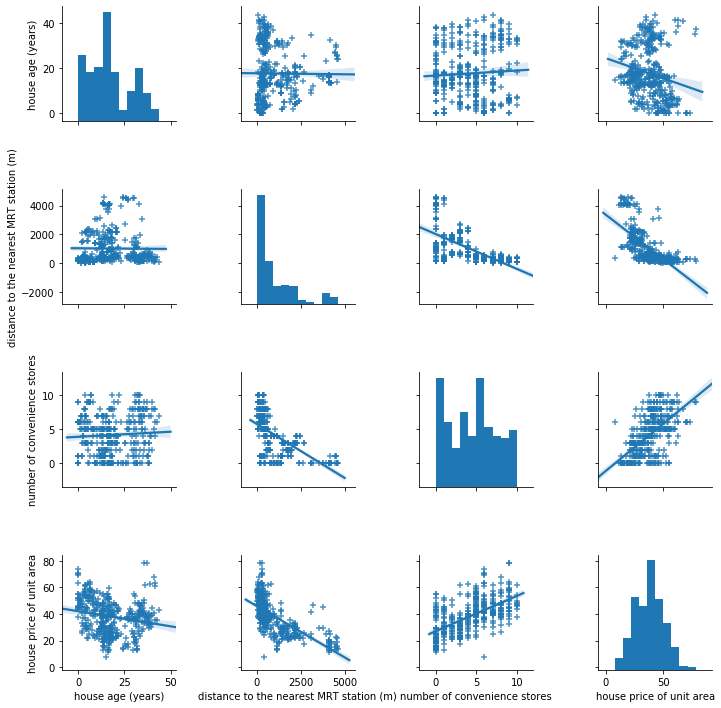

In [27]:
sns.pairplot(df_new2, kind='reg', markers='+')

## Prediction Process After Removing Outliers Using IQR Method

### Preprocessing

In [28]:
#Separate the data

x = df_new[['house age (years)','distance to the nearest MRT station (m)','number of convenience stores']]
y = df_new['house price of unit area']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)
print(x.shape)
print(x_train.shape)
print(x_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(377, 3)
(263, 3)
(114, 3)
(377,)
(263,)
(114,)


### Applying Ml Algorithm

In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

#train the model using train data
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Performance Analysis

In [30]:
trial = model.predict([[13.3, 561.98450, 5]])
print(trial)

[43.33936698]


In [31]:
#get the prediction for data

ypred = model.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, ypred)

0.522469034588642

## Prediction Process After Removing Outliers Using Z Score Method

In [32]:
#Separate the data

x = df_new2[['house age (years)','distance to the nearest MRT station (m)','number of convenience stores']]
y = df_new2['house price of unit area']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)
print(x.shape)
print(x_train.shape)
print(x_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(408, 3)
(285, 3)
(123, 3)
(408,)
(285,)
(123,)


In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

#train the model using train data
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
trial = model.predict([[13.3, 561.98450, 5]])
print(trial)

[42.28238148]


In [35]:
#get the prediction for data

ypred = model.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, ypred)

0.46304157636417276

## Prediction Process Without Removing Outliers

In [36]:
#Separate the data

x = df[['house age (years)','distance to the nearest MRT station (m)','number of convenience stores']]
y = df['house price of unit area']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)
print(x.shape)
print(x_train.shape)
print(x_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(414, 3)
(289, 3)
(125, 3)
(414,)
(289,)
(125,)


In [37]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

#train the model using train data
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
trial = model.predict([[13.3, 561.98450, 5]])
print(trial)

[43.240403]


In [39]:
#get the prediction for data

ypred = model.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, ypred)

0.5480002720789092